In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
path_ssp126 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP126_yearly.nc'
path_ssp245 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP245_yearly.nc'
path_ssp370 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_BC_SSP370_yearly.nc'

In [4]:
data_ssp126 = xr.open_dataset(path_ssp126)
data_ssp245 = xr.open_dataset(path_ssp245)
data_ssp370 = xr.open_dataset(path_ssp370)

In [4]:
data_ssp126

<xarray.Dataset>
Dimensions:  (time: 10, lat: 360, lon: 720)
Coordinates:
  * time     (time) object 2015-01-16 00:00:00 ... 2100-01-16 00:00:00
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Data variables:
    s3       (time, lat, lon) float32 ...
Attributes: (12/35)
    Conventions:               CF-1.6
    activity_id:               input4MIPs
    contact:                   Steven J. Smith (ssmith@pnnl.gov)
    creation_date:             2018-06-20T17:23:05Z
    data_structure:            grid
    dataset_category:          emissions
    ...                        ...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1
    comment:                   SSP harmonized, gridded emissions for IAMC-IMA...
    distribution_date:         2023-11-22
    history:                   2022-02-22: Processed by ECCAD from original m...
    compress_level:            5

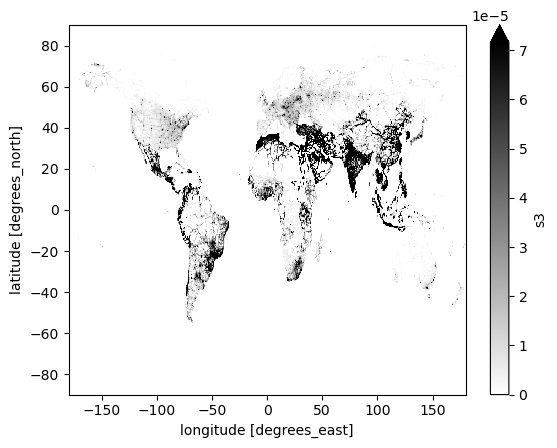

In [5]:
data_ssp370['s3'].mean('time').plot(robust=True, cmap='binary')

In [6]:
ozone_ssp370 = data_ssp370['s3'].mean('time')

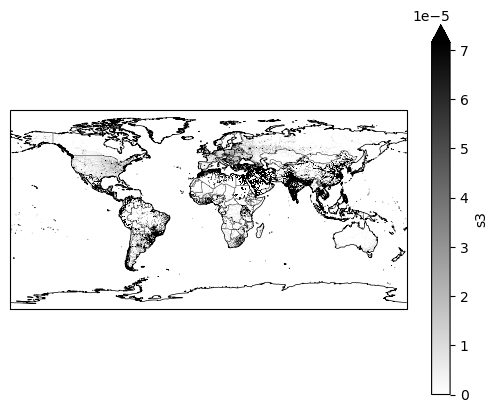

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree())
ozone_ssp370.plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'binary', robust=True) 

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

In [8]:
europe_ozone_ssp370 = ozone_ssp370.isel(lat=slice(250,300), lon = slice(335,420))

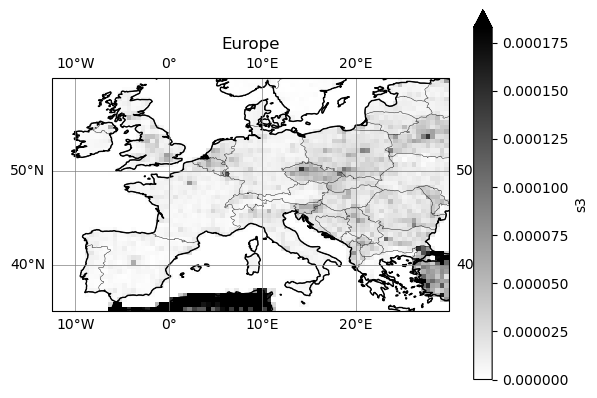

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
europe_ozone_ssp370.plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'binary', robust=True) 
ax.set_title('Europe')

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                 xlocs=range(-180,180,10), ylocs=range(-90,90,10))
ax.coastlines(resolution='50m', linewidth=1, color='black')

In [1]:
lon1_region = -20
lon2_region = 20
lat1_region = -5
lat2_region = 20

In [10]:
wafrica_ozone_ssp370 = ozone_ssp370.isel(lat=slice(180,230), lon = slice(305,400))

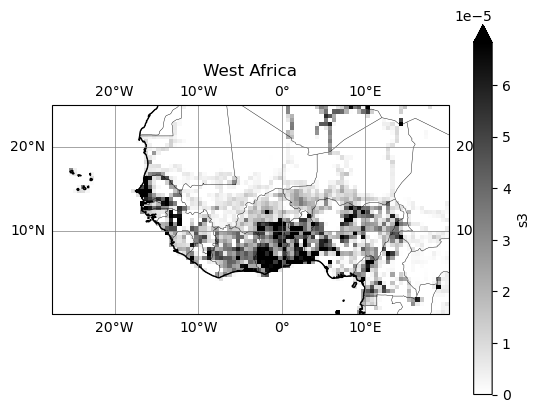

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
wafrica_ozone_ssp370.plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'binary', robust=True) 
ax.set_title('West Africa')

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                 xlocs=range(-180,180,10), ylocs=range(-90,90,10))
ax.coastlines(resolution='50m', linewidth=1, color='black')

In [ ]:
20W 20E, 20N -5N  

In [8]:
def region_total(emissions):
    emissions_regional = select_region(emissions) 
    return emissions_regional.sum('lat').sum('lon')

def global_total(emissions):
    return emissions.sum('lat').sum('lon')

def select_region(data):
    return data.sel(lon=slice(lon1_region, lon2_region)).sel(lat=slice(lat1_region, lat2_region))

(array([3.9784e+04, 1.6300e+02, 2.9000e+01, 1.3000e+01, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0.0000000e+00, 9.1353999e-05, 1.8270800e-04, 2.7406198e-04,
        3.6541600e-04, 4.5676998e-04, 5.4812396e-04, 6.3947798e-04,
        7.3083199e-04, 8.2218595e-04, 9.1353996e-04], dtype=float32),
 <BarContainer object of 10 artists>)

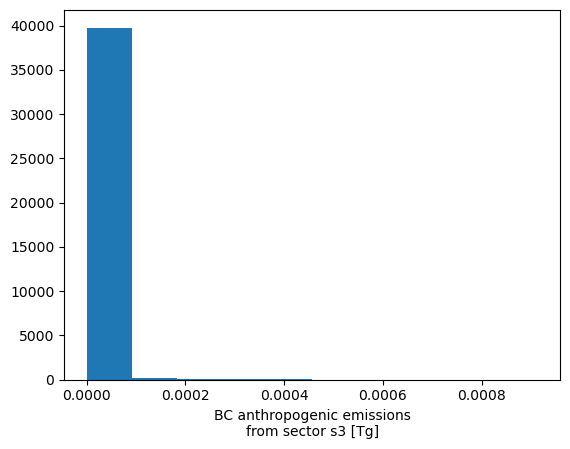

In [11]:
xr.open_dataset(path_ssp126)['s3'].sel(lon=slice(lon1_region, lon2_region)).sel(lat=slice(lat1_region, lat2_region)).mean()

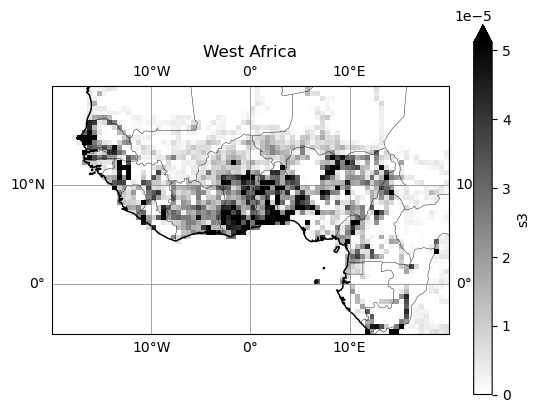

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ssp126.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'binary', robust=True) 
ax.set_title('West Africa')

ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray',
                 xlocs=range(-180,180,10), ylocs=range(-90,90,10))
ax.coastlines(resolution='50m', linewidth=1, color='black')